<a href="https://colab.research.google.com/github/nmshafie1993/Face_Mask_Detection/blob/master/Face_Mask_Detection_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [3]:
#cloning the data from github
!git clone "https://github.com/nmshafie1993/Face_Mask_Detection.git"

fatal: destination path 'Face_Mask_Detection' already exists and is not an empty directory.


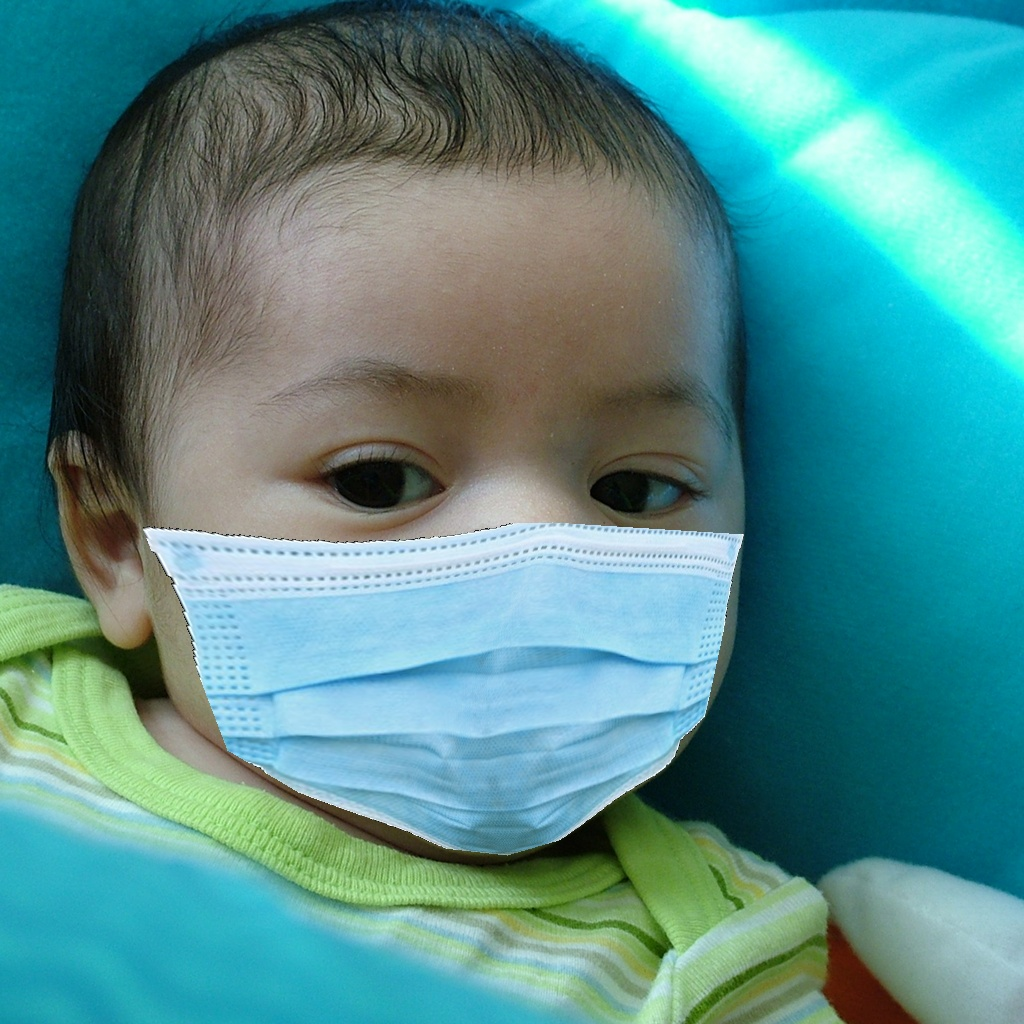

In [4]:
Image(filename='/content/Face_Mask_Detection/data/Maks/00000_Mask.jpg', width = 224, height=224)

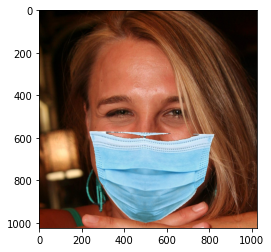

In [5]:
img_array = cv2.imread('/content/Face_Mask_Detection/data/Maks/00001_Mask.jpg')
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));

In [6]:
img_array.shape

(1024, 1024, 3)

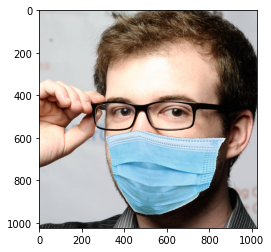

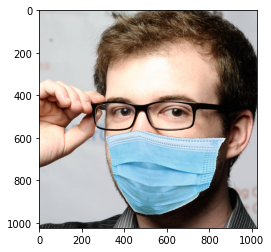

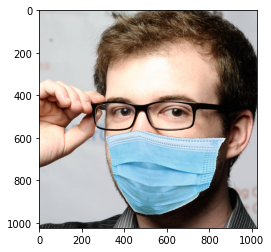

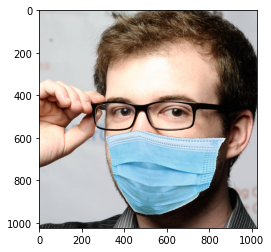

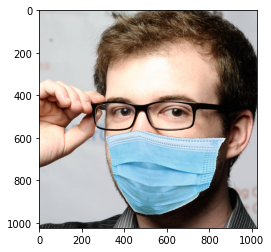

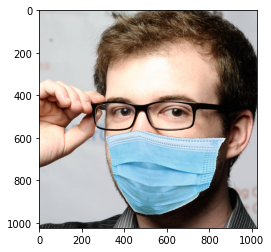

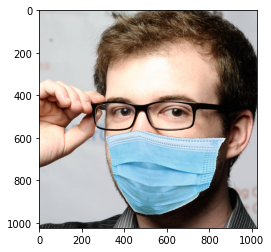

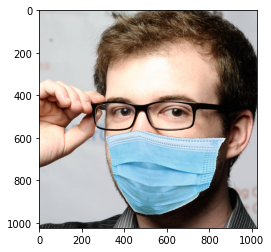

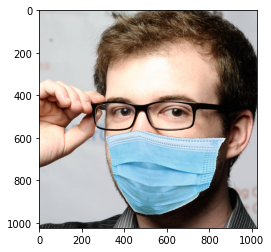

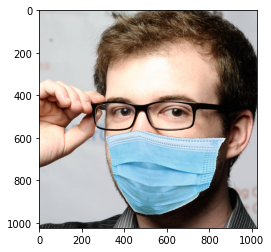

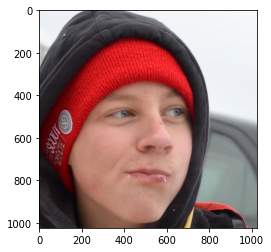

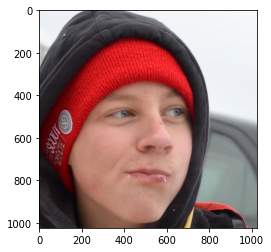

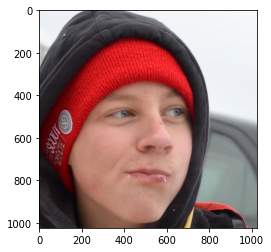

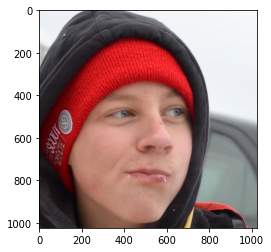

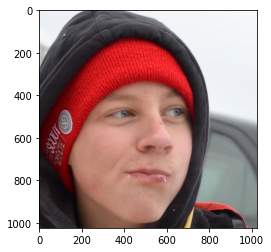

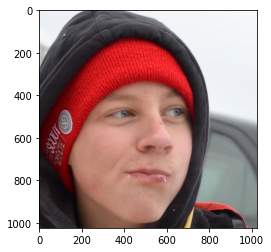

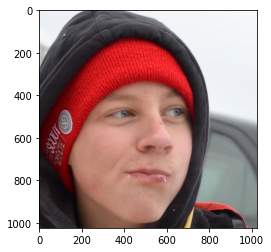

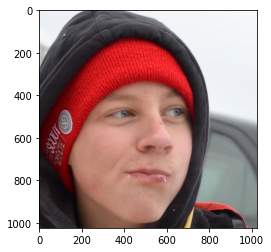

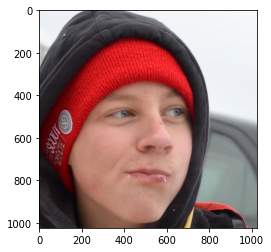

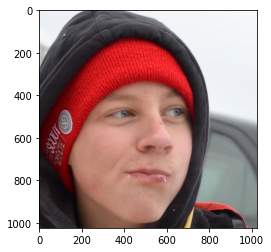

In [7]:
#enumerate
dataDict = '/content/Face_Mask_Detection/data/'
categories = ['Maks', 'No_Masks']
counter = 0
for category in categories:
  path = os.path.join(dataDict, category) 
  for img in os.listdir(path):
    while counter < 10:
      img_array = cv2.imread(os.path.join(path, img))
      plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));
      plt.show()
      counter += 1
  counter = 0

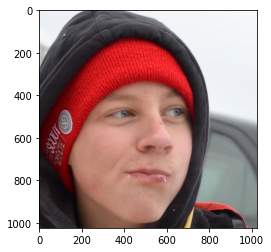

In [8]:
img_size = 224 #ImageNet 224 * 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));

In [9]:
training = []
def create_training():
  for category in categories:
    path = os.path.join(dataDict, category)
    classNum = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training.append([new_array, classNum])
      except:
        pass


In [10]:
create_training()

In [11]:
print(len(training))

1950


In [12]:
import random
random.shuffle(training)

In [13]:
X = []
y = []

for feature, label in training:
  X.append(feature)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [14]:
X.shape

(1950, 224, 224, 3)

In [15]:
X = X/225.0

In [16]:
Y = np.array(y)

In [17]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.mobilenet.MobileNet()

In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [22]:
base_input = model.layers[0].input

In [23]:
base_output = model.layers[-4].input

In [25]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [27]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [28]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [29]:
new_model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = "accuracy")

In [31]:
new_model.fit(X, Y, epochs = 5, validation_split=0.1)

55/55 [==============================] - 22s 223ms/step - loss: 0.0801 - accuracy: 0.9496 - val_loss: 0.0013 - val_accuracy: 1.0000


In [33]:
new_model.save('my_model.h5')

In [34]:
new_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
frame = cv2.imread("")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(frame, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image / 255

In [ ]:
Prediction = new_model.predict(final_image)
Prediction

In [ ]:
frame = cv2.imread("")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))